## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [529]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import math
from numpy import linalg as LA

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [530]:
x = np.linspace(0, 20,50)
y = -1 * x + 2

In [531]:
print(x,y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ] [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.8367

#### Plot your data points. 

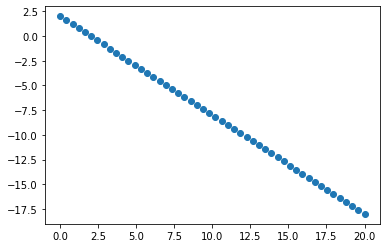

In [532]:
plt.scatter(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

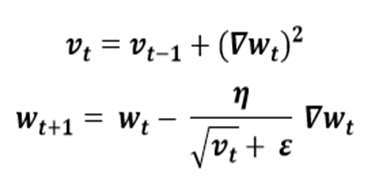

In [533]:
#### Adagrad Algorithm
def adagrad_algorithm(x,y,learning_rate,epsilon,max_iter):
        final_thetas = []
        cost_func = [];
        theta0_val = [];
        theta1_val = [];
        hypothesis_output = [];
        theta_0 = 0
        theta_1 = 0
        vt_zero = 0
        vt_one = 0
        i=1
        while i <= max_iter :
            #step 2
            output_hx = theta_0 + theta_1 * x
            hypothesis_output.append(output_hx)
            #step 3
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func.append(j_theta)
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            #step 4
            #theta 0 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            #theta 1 gradient
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #step 5
            vt_zero = vt_zero + theta_0_gradient**2
            vt_one = vt_one + theta_1_gradient**2
            #next theta 0 => update
            theta_0 = theta_0 - (learning_rate / ( math.sqrt(vt_zero) + epsilon ))* theta_0_gradient
            #next theta 1 => update
            theta_1 = theta_1 - (learning_rate / ( math.sqrt(vt_one) + epsilon ))* theta_1_gradient
            gradient_vector = np.array(theta_0_gradient,theta_1_gradient)
            gradient_vector_norm = LA.norm(gradient_vector)
            if i == max_iter or gradient_vector_norm<=0.0001:#stop criteria
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas.append(final_theta_0)
                final_thetas.append(final_theta_1)
                return final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output
            i+=1

In [534]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = adagrad_algorithm(x,y,0.15,1e-8,1000)
print("No of iterations: " , len(cost_func))

No of iterations:  1000


In [535]:
print(r2_score(y, hypothesis_output[-1]))

0.9991916097022996


Text(0, 0.5, 'cost func')

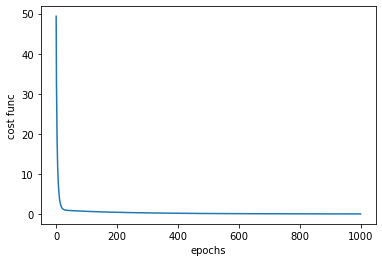

In [536]:
plt.plot(range(len(cost_func)),cost_func)
plt.xlabel("epochs")
plt.ylabel("cost func")

Text(0, 0.5, 'cost func')

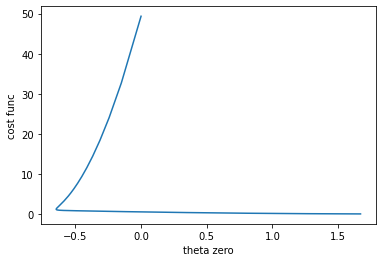

In [537]:
plt.plot(theta0_val,cost_func)
plt.xlabel("theta zero")
plt.ylabel("cost func")

Text(0, 0.5, 'cost func')

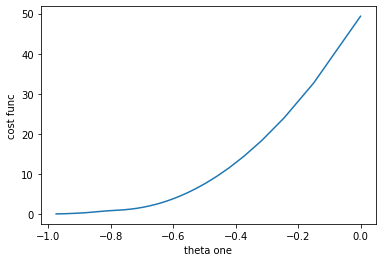

In [538]:
plt.plot(theta1_val,cost_func)
plt.xlabel("theta one")
plt.ylabel("cost func")

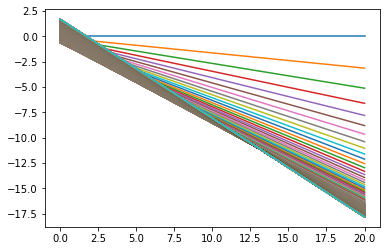

In [539]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

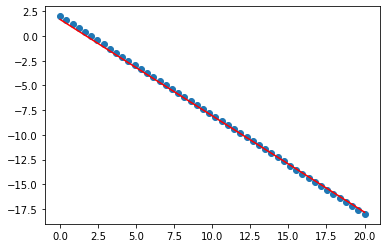

In [540]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1],color="red")

## Trying Different Hyperparameter

In [541]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = adagrad_algorithm(x,y,0.08,1e-8,1000)
print("No of iterations: " , len(cost_func))
print(r2_score(y, hypothesis_output[-1]))

No of iterations:  1000
0.9867765885658483


Text(0, 0.5, 'cost func')

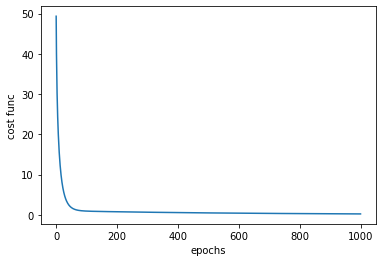

In [542]:
plt.plot(range(len(cost_func)),cost_func)
plt.xlabel("epochs")
plt.ylabel("cost func")

Text(0, 0.5, 'cost func')

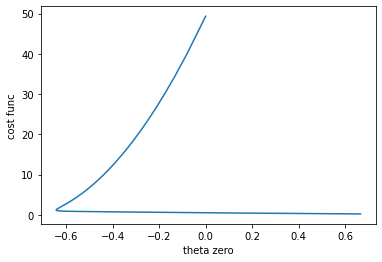

In [543]:
plt.plot(theta0_val,cost_func)
plt.xlabel("theta zero")
plt.ylabel("cost func")

Text(0, 0.5, 'cost func')

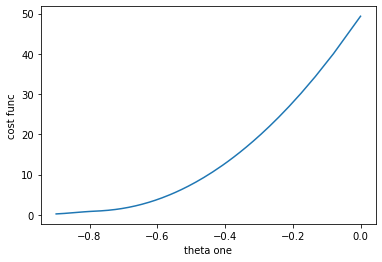

In [544]:
plt.plot(theta1_val,cost_func)
plt.xlabel("theta one")
plt.ylabel("cost func")

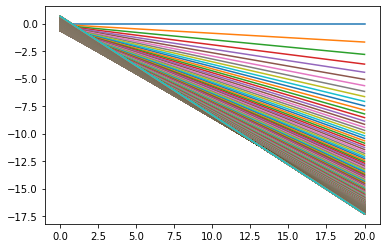

In [511]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

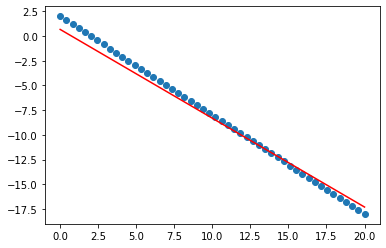

In [512]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1],color="red")

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

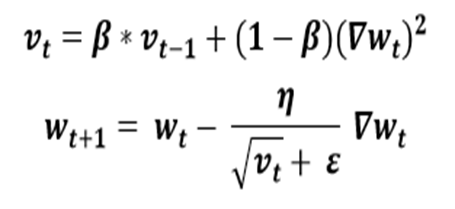

In [513]:
#### RMSProp  Algorithm
def RMSProp_algorithm(x,y,learning_rate,epsilon,max_iter):
        beta = 0.9
        final_thetas = []
        cost_func = [];
        theta0_val = [];
        theta1_val = [];
        hypothesis_output = [];
        theta_0 = 0
        theta_1 = 0
        vt_zero = 0
        vt_one = 0
        i=1
        while i <= max_iter :
            #step 2
            output_hx = theta_0 + theta_1 * x
            hypothesis_output.append(output_hx)
            #step 3
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func.append(j_theta)
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            #step 4
            #theta 0 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            #theta 1 gradient
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #step 5
            vt_zero = beta * vt_zero + (1-beta) * theta_0_gradient**2
            vt_one = beta * vt_one + (1-beta) * theta_1_gradient**2
            #next theta 0 => update
            theta_0 = theta_0 - (learning_rate / ( math.sqrt(vt_zero) + epsilon ))* theta_0_gradient
            #next theta 1 => update
            theta_1 = theta_1 - (learning_rate / ( math.sqrt(vt_one) + epsilon ))* theta_1_gradient
            gradient_vector = np.array(theta_0_gradient,theta_1_gradient)
            gradient_vector_norm = LA.norm(gradient_vector)
            if i == max_iter or gradient_vector_norm<=0.0001:#stop criteria
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas.append(final_theta_0)
                final_thetas.append(final_theta_1)
                return final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output
            i+=1

In [514]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = RMSProp_algorithm(x,y,0.01,1e-8,400)
print("No of iterations: " , len(cost_func))

No of iterations:  400


In [515]:
print(r2_score(y, hypothesis_output[-1]))

0.9998631076907581


Text(0, 0.5, 'cost func')

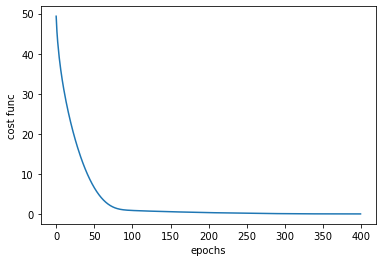

In [516]:
plt.plot(range(len(cost_func)),cost_func)
plt.xlabel("epochs")
plt.ylabel("cost func")

Text(0, 0.5, 'cost func')

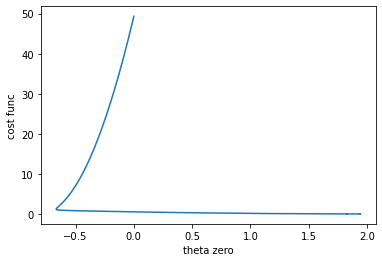

In [517]:
plt.plot(theta0_val,cost_func)
plt.xlabel("theta zero")
plt.ylabel("cost func")

Text(0, 0.5, 'cost func')

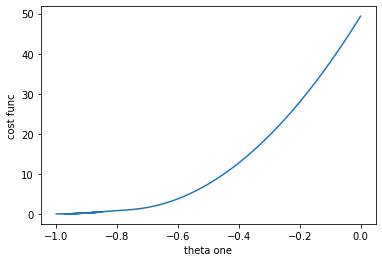

In [518]:
plt.plot(theta1_val,cost_func)
plt.xlabel("theta one")
plt.ylabel("cost func")

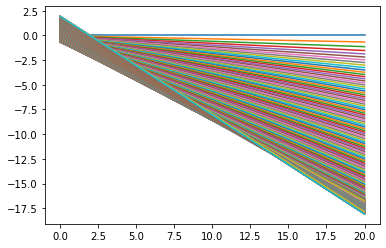

In [519]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

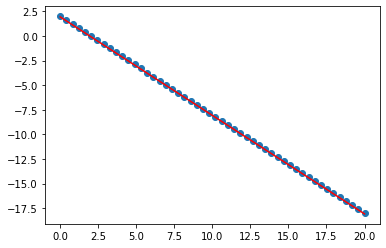

In [520]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1],color="red")

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

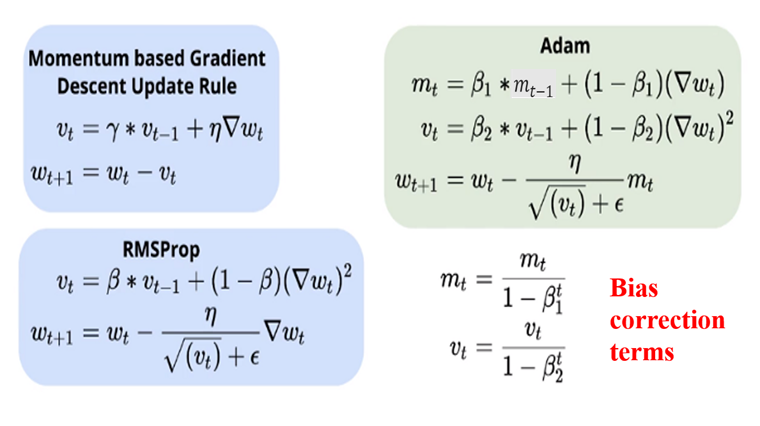

In [521]:
#### Adam  Algorithm
def Adam_algorithm(x,y,learning_rate,epsilon,max_iter):
        beta1 = 0.9
        beta2 = 0.99
        final_thetas = []
        cost_func = [];
        theta0_val = [];
        theta1_val = [];
        hypothesis_output = [];
        theta_0 = 0
        theta_1 = 0
        vt_zero = 0
        vt_one = 0
        mt_zero = 0
        mt_one = 0
        i=1
        while i <= max_iter :
            #step 2
            output_hx = theta_0 + theta_1 * x
            hypothesis_output.append(output_hx)
            #step 3
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func.append(j_theta)
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            #step 4
            #theta 0 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            #theta 1 gradient
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #step 5
            mt_zero = beta1 * mt_zero + (1-beta1) * theta_0_gradient
            vt_zero = beta2 * vt_zero + (1-beta2) * theta_0_gradient**2
            #correction
            mt_zero_corrected = mt_zero / (1-beta1**i)
            vt_zero_corrected = vt_zero / (1-beta2**i)
            
            mt_one = beta1 * mt_one + (1-beta1) * theta_1_gradient
            vt_one = beta2 * vt_one + (1-beta2) * theta_1_gradient**2
            #correction
            mt_one_corrected = mt_one / (1-beta1**i)
            vt_one_corrected = vt_one / (1-beta2**i)
            #next theta 0 => update
            theta_0 = theta_0 - (learning_rate / ( math.sqrt(vt_zero_corrected) + epsilon ))* mt_zero_corrected
            #next theta 1 => update
            theta_1 = theta_1 - (learning_rate / ( math.sqrt(vt_one_corrected) + epsilon ))* mt_one_corrected
            gradient_vector = np.array(theta_0_gradient,theta_1_gradient)
            gradient_vector_norm = LA.norm(gradient_vector)
            if i == max_iter or gradient_vector_norm<=0.0001:#stop criteria
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas.append(final_theta_0)
                final_thetas.append(final_theta_1)
                return final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output
            i+=1

In [522]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = Adam_algorithm(x,y,0.01,1e-8,1000)
print("No of iterations: " , len(cost_func))

No of iterations:  933


In [523]:
print(r2_score(y, hypothesis_output[-1]))

0.9999999989233566


Text(0, 0.5, 'cost func')

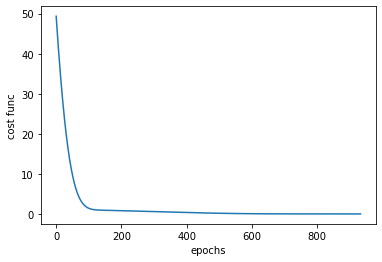

In [524]:
plt.plot(range(len(cost_func)),cost_func)
plt.xlabel("epochs")
plt.ylabel("cost func")

Text(0, 0.5, 'cost func')

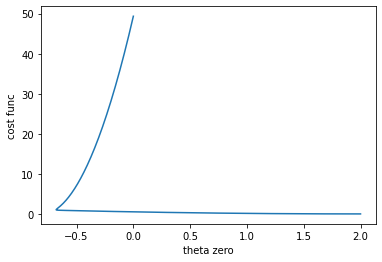

In [525]:
plt.plot(theta0_val,cost_func)
plt.xlabel("theta zero")
plt.ylabel("cost func")

Text(0, 0.5, 'cost func')

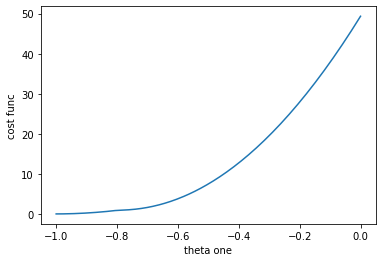

In [526]:
plt.plot(theta1_val,cost_func)
plt.xlabel("theta one")
plt.ylabel("cost func")

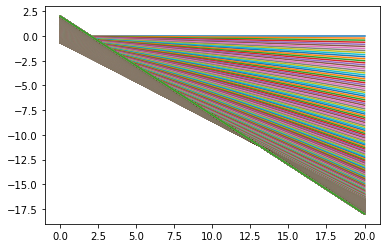

In [527]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

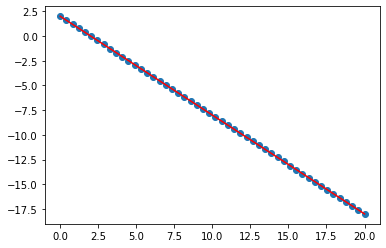

In [528]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1],color="red")

## Congratulations 
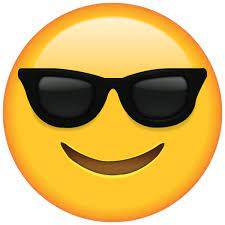